## Домашнее задание №7

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), @neychev

In [1]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
from torchvision.datasets import MNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output

### Задача №1:
Обратимся к классической задаче распознавания рукописных цифр. Мы будем работать с набором данных [MNIST](http://yann.lecun.com/exdb/mnist/). В данном задании воспользуемся всем датасетом целиком.

__Ваша основная задача: реализовать весь пайплан обучения модели и добиться качества $\geq 92\%$ на тестовой выборке.__

Код для обучения модели в данном задании отсутствует. Присутствует лишь несколько тестов, которые помогут вам отладить свое решение. За примером можно обратиться к ноутбуку первого занятия.

Настоятельно рекомендуем написать код "с нуля", лишь поглядывая на готовые примеры, а не просто "скопировать-вставить". Это поможет вам в дальнейшем.

100%|██████████| 9912422/9912422 [00:00<00:00, 109324608.32it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 59264038.07it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 23184193.86it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5534726.55it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



Text(0.5, 1.0, 'Image label: 3')

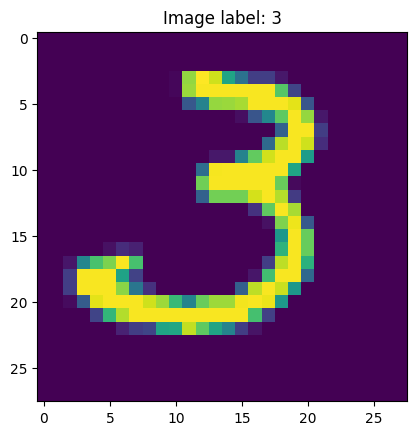

In [2]:
# do not change the code in the block below
# __________start of block__________

train_mnist_data = MNIST('.', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_mnist_data = MNIST('.', train=False, transform=torchvision.transforms.ToTensor(), download=True)


train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f'Image label: {_label}')
# __________end of block__________

Постройте модель ниже. Пожалуйста, не стройте переусложненную сеть, не стоит делать ее глубже четырех слоев (можно и меньше). Ваша основная задача – обучить модель и получить качество на отложенной (тестовой выборке) не менее 92% accuracy.

*Комментарий: для этого достаточно линейных слоев и функций активации.*

__Внимание, ваша модель должна быть представлена именно переменной `model`.__

In [3]:
# Creating model instance
class MNIST_Model(nn.Module):
    def __init__(self):
        super(MNIST_Model, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

model = MNIST_Model()

Локальные тесты для проверки вашей модели доступны ниже:

In [4]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, 'Please, use `model` variable to store your model'

try:
    x = random_batch[0].reshape(-1, 784)
    y = random_batch[1]

    # compute outputs given inputs, both are variables
    y_predicted = model(x)
except Exception as e:
    print('Something is wrong with the model')
    raise e


assert y_predicted.shape[-1] == 10, 'Model should predict 10 logits/probas'

print('Everything seems fine!')
# __________end of block__________

Everything seems fine!


Настройте параметры модели на обучающей выборке. Рекомендуем поработать с различными оптимизаторами.

In [5]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()

In [6]:
def train(model, optimizer, criterion, train_loader):
    model.train()
    train_loss = 0.0
    train_correct = 0

    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
        _, predicted = torch.max(output.data, 1)
        train_correct += (predicted == target).sum().item()

    train_loss /= len(train_loader.dataset)
    train_accuracy = 100. * train_correct / len(train_loader.dataset)

    return train_loss, train_accuracy

# Тестирование модели
def test(model, criterion, test_loader):
    model.eval()
    test_loss = 0.0
    test_correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item() * data.size(0)
            _, predicted = torch.max(output.data, 1)
            test_correct += (predicted == target).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * test_correct / len(test_loader.dataset)

    return test_loss, test_accuracy


In [7]:
model = MNIST_Model()
sgd_optimizer = optim.SGD(model.parameters(), lr=0.01)
for epoch in range(10):
    train_loss, train_accuracy = train(model, sgd_optimizer, criterion, train_data_loader)
    test_loss, test_accuracy = test(model, criterion, test_data_loader)
    print(f"Epoch: {epoch+1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

Epoch: 1, Train Loss: 2.2991, Train Accuracy: 25.65%, Test Loss: 2.2935, Test Accuracy: 38.10%
Epoch: 2, Train Loss: 2.2668, Train Accuracy: 34.01%, Test Loss: 2.2009, Test Accuracy: 34.50%
Epoch: 3, Train Loss: 2.0412, Train Accuracy: 50.33%, Test Loss: 1.8629, Test Accuracy: 68.76%
Epoch: 4, Train Loss: 1.7849, Train Accuracy: 74.47%, Test Loss: 1.7114, Test Accuracy: 80.29%
Epoch: 5, Train Loss: 1.6899, Train Accuracy: 80.85%, Test Loss: 1.6607, Test Accuracy: 82.71%
Epoch: 6, Train Loss: 1.6582, Train Accuracy: 82.47%, Test Loss: 1.6425, Test Accuracy: 83.73%
Epoch: 7, Train Loss: 1.6446, Train Accuracy: 83.16%, Test Loss: 1.6335, Test Accuracy: 84.00%
Epoch: 8, Train Loss: 1.6366, Train Accuracy: 83.66%, Test Loss: 1.6281, Test Accuracy: 84.44%
Epoch: 9, Train Loss: 1.6312, Train Accuracy: 83.98%, Test Loss: 1.6238, Test Accuracy: 84.62%
Epoch: 10, Train Loss: 1.6272, Train Accuracy: 84.23%, Test Loss: 1.6207, Test Accuracy: 84.81%


In [8]:
model = MNIST_Model()
adam_optimizer = optim.Adam(model.parameters(), lr=0.001)
for epoch in range(10):
    train_loss, train_accuracy = train(model, adam_optimizer, criterion, train_data_loader)
    test_loss, test_accuracy = test(model, criterion, test_data_loader)
    print(f"Epoch: {epoch+1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")


Epoch: 1, Train Loss: 1.5685, Train Accuracy: 90.08%, Test Loss: 1.5139, Test Accuracy: 94.97%
Epoch: 2, Train Loss: 1.5109, Train Accuracy: 95.16%, Test Loss: 1.5058, Test Accuracy: 95.65%
Epoch: 3, Train Loss: 1.4997, Train Accuracy: 96.24%, Test Loss: 1.4994, Test Accuracy: 96.29%
Epoch: 4, Train Loss: 1.4934, Train Accuracy: 96.80%, Test Loss: 1.5034, Test Accuracy: 95.83%
Epoch: 5, Train Loss: 1.4898, Train Accuracy: 97.19%, Test Loss: 1.4940, Test Accuracy: 96.77%
Epoch: 6, Train Loss: 1.4862, Train Accuracy: 97.53%, Test Loss: 1.4899, Test Accuracy: 97.13%
Epoch: 7, Train Loss: 1.4850, Train Accuracy: 97.66%, Test Loss: 1.4960, Test Accuracy: 96.52%
Epoch: 8, Train Loss: 1.4821, Train Accuracy: 97.90%, Test Loss: 1.4882, Test Accuracy: 97.25%
Epoch: 9, Train Loss: 1.4818, Train Accuracy: 97.94%, Test Loss: 1.4913, Test Accuracy: 96.97%
Epoch: 10, Train Loss: 1.4814, Train Accuracy: 97.97%, Test Loss: 1.4876, Test Accuracy: 97.32%


In [9]:
model = MNIST_Model()
adagrad_optimizer = optim.Adagrad(model.parameters(), lr=0.01)
for epoch in range(10):
    train_loss, train_accuracy = train(model, adagrad_optimizer, criterion, train_data_loader)
    test_loss, test_accuracy = test(model, criterion, test_data_loader)
    print(f"Epoch: {epoch+1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

Epoch: 1, Train Loss: 1.5652, Train Accuracy: 90.37%, Test Loss: 1.5184, Test Accuracy: 94.83%
Epoch: 2, Train Loss: 1.5119, Train Accuracy: 95.37%, Test Loss: 1.5086, Test Accuracy: 95.58%
Epoch: 3, Train Loss: 1.5027, Train Accuracy: 96.19%, Test Loss: 1.5034, Test Accuracy: 96.03%
Epoch: 4, Train Loss: 1.4971, Train Accuracy: 96.77%, Test Loss: 1.5000, Test Accuracy: 96.21%
Epoch: 5, Train Loss: 1.4932, Train Accuracy: 97.11%, Test Loss: 1.4974, Test Accuracy: 96.57%
Epoch: 6, Train Loss: 1.4902, Train Accuracy: 97.41%, Test Loss: 1.4957, Test Accuracy: 96.70%
Epoch: 7, Train Loss: 1.4880, Train Accuracy: 97.64%, Test Loss: 1.4940, Test Accuracy: 96.96%
Epoch: 8, Train Loss: 1.4861, Train Accuracy: 97.81%, Test Loss: 1.4934, Test Accuracy: 97.02%
Epoch: 9, Train Loss: 1.4846, Train Accuracy: 97.95%, Test Loss: 1.4930, Test Accuracy: 97.03%
Epoch: 10, Train Loss: 1.4831, Train Accuracy: 98.08%, Test Loss: 1.4915, Test Accuracy: 97.17%


Также, напоминаем, что в любой момент можно обратиться к замечательной [документации](https://pytorch.org/docs/stable/index.html) и [обучающим примерам](https://pytorch.org/tutorials/).  

Оценим качество классификации:

In [10]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [11]:
print(f'Neural network accuracy on train set: {train_acc:3.5}')

Neural network accuracy on train set: 0.98213


In [12]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [13]:
print(f'Neural network accuracy on test set: {test_acc:3.5}')

Neural network accuracy on test set: 0.9717


Проверка, что необходимые пороги пройдены:

In [14]:
assert test_acc >= 0.92, 'Test accuracy is below 0.92 threshold'
assert train_acc >= 0.91, 'Train accuracy is below 0.91 while test accuracy is fine. We recommend to check your model and data flow'

### Сдача задания
Загрузите файл `hw07_data_dict.npy` (ссылка есть на странице с заданием) и запустите код ниже для генерации посылки. Код ниже может его загрузить (но в случае возникновения ошибки скачайте и загрузите его вручную).

In [15]:
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/23s_dd_ml/homeworks/hw07_mnist_classification/hw07_data_dict.npy

--2023-12-04 09:11:52--  https://raw.githubusercontent.com/girafe-ai/ml-course/23s_dd_ml/homeworks/hw07_mnist_classification/hw07_data_dict.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6272438 (6.0M) [application/octet-stream]
Saving to: ‘hw07_data_dict.npy’

hw07_data_dict.npy  100%[===================>]   5.98M  --.-KB/s    in 0.09s   

2023-12-04 09:11:53 (68.8 MB/s) - ‘hw07_data_dict.npy’ saved [6272438/6272438]



In [17]:
# do not change the code in the block below
# __________start of block__________
import os
import json
assert os.path.exists('hw07_data_dict.npy'), 'Please, download `hw07_data_dict.npy` and place it in the working directory'

def get_predictions(model, eval_data, step=10):

    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx:idx+step].reshape(-1, 784))
            predicted_labels.append(y_predicted.argmax(dim=1))

    predicted_labels = torch.cat(predicted_labels).numpy()
    predicted_labels = ','.join([str(x) for x in list(predicted_labels)])
    return predicted_labels

loaded_data_dict = np.load('hw07_data_dict.npy', allow_pickle=True)

submission_dict = {
    'train': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['train'])),
    'test': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['test']))
}

with open('submission_dict_hw07.json', 'w') as iofile:
    json.dump(submission_dict, iofile)
print('File saved to `submission_dict_hw07.json`')
# __________end of block__________

File saved to `submission_dict_hw07.json`


На этом задание завершено. Поздравляем!